In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_0_1 = pd.read_excel(r'../prediction_and_selection/Selected_molecules_from_0_1_tensor_scaling.xlsx')

In [3]:
print(data_0_1.head())
print(len(data_0_1))

   Unnamed: 0                                        SMILES  molecular_weight  \
0           0  CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2        335.121609   
1           1      CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12        289.088498   
2           2     CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C        301.099731   
3           3     CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1        307.115461   
4           4   CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C        346.126360   

      logp  h_bond_donors  h_bond_acceptors  rotatable_bonds  \
0  1.83410              4                 5                5   
1  1.09228              0                 4                3   
2  2.10890              1                 5                2   
3  2.84012              1                 4                5   
4  2.83200              2                 4                5   

   Polar surface area  aromatics rings  Lipinski alerts - to QED calc  \
0               70.98                2                 

In [4]:
data_0_6 = pd.read_excel(r'../prediction_and_selection/Selected_molecules_from_0_2_tensor_scaling.xlsx')

In [5]:
print(data_0_6.head())
print(len(data_0_6))

   Unnamed: 0                                          SMILES  \
0           0             C1CC(=O)NCCC(SC2=N[NH1]C=N2)C1(CC)C   
1           1           CCC(=O)NC1CC(C2=N[NH1]C=C2C(C)=C=N)O1   
2           2  CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)[NH1]N=2   
3           3     CCC(=O)NCC1=C2N=C(CC3=N[NH1]C(C)=C3Cl)N1CC2   
4           4             CCC(=O)NCC(F)C1=NSC(C2=CC=CC=N2)=N1   

   molecular_weight     logp  h_bond_donors  h_bond_acceptors  \
0        268.135782  1.98180              2                 4   
1        248.127326  1.37517              3                 4   
2        333.105959  2.13020              2                 5   
3        307.119988  1.74112              2                 4   
4        280.079410  2.13690              1                 5   

   rotatable_bonds  Polar surface area  aromatics rings  \
0                3               70.67                1   
1                4               90.86                1   
2                5               71.31   

In [6]:
docked_molecules = pd.read_excel('dockingResults_ROR_gamma_SYBA_CLEAN.xlsx')
docked_molecules = docked_molecules.iloc[0:10]

In [7]:
print(docked_molecules.head())
print(len(docked_molecules))

   Unnamed: 0                                          smiles  7npc  7np5  \
0           0     CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C  -7.9  -8.2   
1           1        CCC(=O)NCC1C(C2=N[NH1]C=C2C(C)(C)O)N=C1N  -6.5  -6.9   
2           2  CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)[NH1]N=2  -8.6  -8.1   
3           3     CC1=CC=CC(C(=O)CC2=NC(Cl)=CC3=CC=CN=C23)=C1  -9.2 -10.0   
4           4      CC1=CC=CC(C(=O)NC2=CC(C3=CC=CC=C3)=NO2)=C1  -8.8  -9.0   

   7kxd  
0  -8.6  
1  -6.7  
2  -8.7  
3  -8.7  
4  -9.2  
10


In [8]:
docked_molecules['0.1_tensor_scaling_prediction'] = 0
docked_molecules['0.2_tensor_scaling_prediction'] = 0
for i in range(len(docked_molecules)):
    if docked_molecules['smiles'][i] in list(data_0_1['SMILES']):
        docked_molecules['0.1_tensor_scaling_prediction'][i] = 1
    elif docked_molecules['smiles'][i] in list(data_0_6['SMILES']):
        docked_molecules['0.2_tensor_scaling_prediction'][i] = 1
    else:
        
        print('Not found in first and second prediction dataset '+str(docked_molecules['smiles'][i]))
for i in range(len(docked_molecules)):
    if docked_molecules['smiles'][i] in list(data_0_6['SMILES']):
        docked_molecules['0.2_tensor_scaling_prediction'][i] = 1
    elif docked_molecules['smiles'][i] in list(data_0_1['SMILES']):
        docked_molecules['0.1_tensor_scaling_prediction'][i] = 1
    else:
        
        print('Not found in first and second prediction dataset '+str(docked_molecules['smiles'][i]))

In [9]:
docked_molecules

,Unnamed: 0,smiles,7npc,7np5,7kxd,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction
0,0,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,-7.9,-8.2,-8.6,1,0
1,1,CCC(=O)NCC1C(C2=N[NH1]C=C2C(C)(C)O)N=C1N,-6.5,-6.9,-6.7,1,0
2,2,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)[NH1]N=2,-8.6,-8.1,-8.7,1,1
3,3,CC1=CC=CC(C(=O)CC2=NC(Cl)=CC3=CC=CN=C23)=C1,-9.2,-10.0,-8.7,1,1
4,4,CC1=CC=CC(C(=O)NC2=CC(C3=CC=CC=C3)=NO2)=C1,-8.8,-9.0,-9.2,1,1
5,5,CC1=CC=CC(C(=O)CC2=NC(CC3=CC=CO3)=CS2)=C1,-8.0,-8.2,-8.5,1,0
6,6,CC(=O)NC1=CC=CC(=C1)C(=O)N(CC2=CC=CC=C2NC3=NC(...,-10.0,-9.1,-9.2,1,0
7,7,CC(=O)NC1=CC=CC(=C1)C(=O)N(CC2=CC=CC3=C2N4C(C)...,-8.7,-8.8,-10.0,1,0
8,8,CC(=O)NC1=CC=CC(=C1)C(=O)NCC=CC2C=CN(C)C=C(F)C...,-9.9,-9.5,-10.0,1,1
9,9,CCC(=O)NCC(F)C1=NSC(C2=CC=CC=N2)=N1,-6.6,-6.9,-7.2,0,1


In [10]:
from rdkit import Chem
from rdkit.Chem import Draw

In [11]:
mols_01 = [Chem.MolFromSmiles(smi) for smi in docked_molecules.loc[docked_molecules['0.1_tensor_scaling_prediction'] == 1]['smiles']]

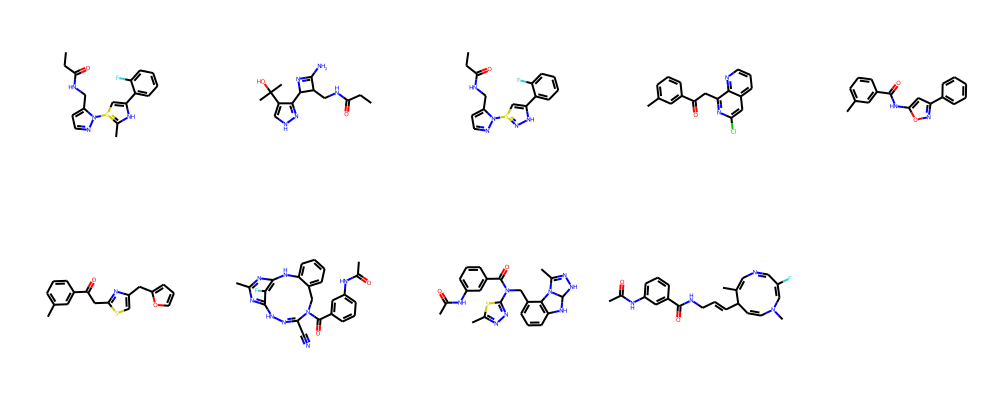

In [12]:
Draw.MolsToGridImage(mols_01, molsPerRow=5)

In [13]:
mols_06 = [Chem.MolFromSmiles(smi) for smi in docked_molecules.loc[docked_molecules['0.2_tensor_scaling_prediction'] == 1]['smiles']]

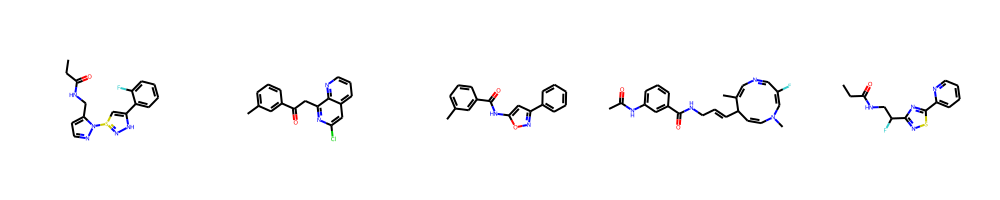

In [14]:
Draw.MolsToGridImage(mols_06, molsPerRow=5)

## Initial ROR-y activ structures

In [16]:
initial_smi = pd.read_excel(r'../prediction_and_selection/RORgamma_active_QED_LIPINSKI_SYBA_all.xlsx')
initial_smi = list(initial_smi['SMILES'])
initial_smi = pd.DataFrame(initial_smi, columns=['SMILES'])
print("Initial data description: ")
print(initial_smi.describe())

print("Examples of initial structures: ")
print(initial_smi[0:3])

Initial data description: 
                                                   SMILES
count                                                   9
unique                                                  9
top     O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...
freq                                                    1
Examples of initial structures: 
                                              SMILES
0  O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...
1  CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...
2  CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...


In [17]:
Kinase_structures_to_get_vector = [Chem.MolFromSmiles(smi) for smi in initial_smi['SMILES']]

In [18]:
len(Kinase_structures_to_get_vector)

9

## Use user input to visualize given structure - max input 215 (216 elements in initial dataset)

In [ ]:
 #Input number from range 0-8 to get corresponding structure

Selected structure 2D visualization: 5


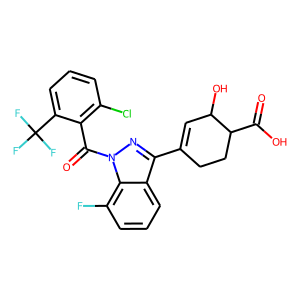

In [19]:
Draw.MolToImage(Kinase_structures_to_get_vector[int(input("Selected structure 2D visualization: "))])

## Batch visualization

In [ ]:
#Input number from range 0-8 to get corresponding structure
#Input number higher than before and lower than 10

Selected structures 2D visualization from: 0
Selected structures 2D visualization to: 9


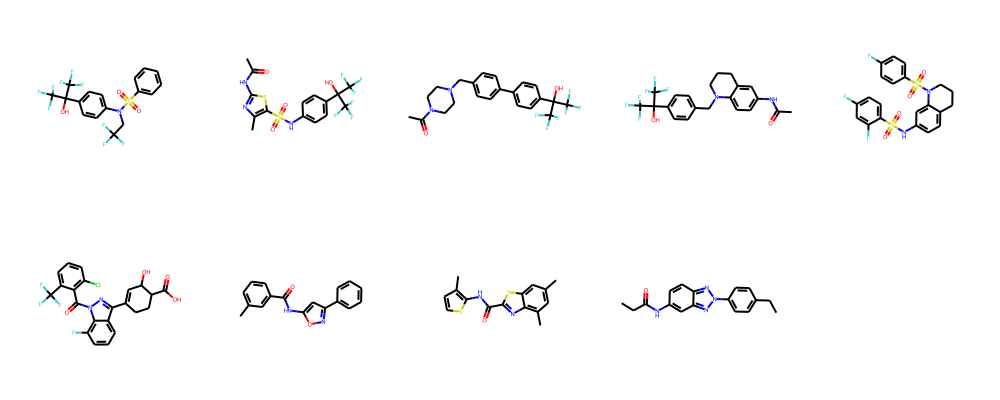

In [21]:
Draw.MolsToGridImage(Kinase_structures_to_get_vector[int(input("Selected structures 2D visualization from: ")):int(input("Selected structures 2D visualization to: "))], molsPerRow=5)